In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Hospital_Billing_Prediction.csv')
df.head()

,Patient_ID,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,509d24a1-fadc-476c-8259-9cada7215121,21.0,Female,Urgent,25.0,Oncology,4,Private,Surgery,35544
1,57ea25f3-6316-48fc-9609-b02865b31cdb,72.0,Female,Emergency,22.0,Neurological,3,Private,Surgery,30294
2,901fa4cd-cf86-4dce-89b6-f5e8aaeffd6e,42.0,Male,Emergency,21.0,Respiratory,0,Private,Diagnostic,31493
3,8466df72-c9da-4ac1-a6cf-755244837bb4,51.0,Male,Elective,6.0,Cardiac,4,NaN,Diagnostic,19227
4,8f3f108f-5351-41e2-a295-e0058118b212,66.0,Male,Emergency,NaN,Neurological,3,Government,Rehabilitation,25180


In [3]:
df.shape

(966, 10)

In [4]:
data_cols = df.columns.tolist()
print(data_cols)

['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Length_of_Stay', 'Disease_Type', 'Previous_Hospitalizations', 'Insurance_Type', 'Procedure_Type', 'Billing_Amount']


In [5]:
df.dtypes

,0
Patient_ID,object
Age,float64
Gender,object
Admission_Type,object
Length_of_Stay,float64
Disease_Type,object
Previous_Hospitalizations,int64
Insurance_Type,object
Procedure_Type,object
Billing_Amount,int64


In [6]:
df.describe()

,Age,Length_of_Stay,Previous_Hospitalizations,Billing_Amount
count,932.000000,942.000000,966.000000,966.000000
mean,52.309013,15.161359,1.996894,25005.581781
std,21.009000,8.251073,1.418235,14655.301574
min,18.000000,1.000000,0.000000,502.000000
25%,34.000000,8.000000,1.000000,11545.250000
50%,52.000000,15.000000,2.000000,25228.500000
75%,71.000000,22.000000,3.000000,37448.000000
max,89.000000,29.000000,4.000000,49914.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 966 non-null    object 
 1   Age                        932 non-null    float64
 2   Gender                     966 non-null    object 
 3   Admission_Type             966 non-null    object 
 4   Length_of_Stay             942 non-null    float64
 5   Disease_Type               966 non-null    object 
 6   Previous_Hospitalizations  966 non-null    int64  
 7   Insurance_Type             623 non-null    object 
 8   Procedure_Type             966 non-null    object 
 9   Billing_Amount             966 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 75.6+ KB


In [8]:
df.isnull().sum()

,0
Patient_ID,0
Age,34
Gender,0
Admission_Type,0
Length_of_Stay,24
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,343
Procedure_Type,0
Billing_Amount,0


In [9]:
df.drop(columns=['Patient_ID'], inplace=True)

In [10]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [11]:
print(num_columns)
df.head()

Index(['Age', 'Length_of_Stay', 'Previous_Hospitalizations', 'Billing_Amount'], dtype='object')


,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,21.0,Female,Urgent,25.0,Oncology,4,Private,Surgery,35544
1,72.0,Female,Emergency,22.0,Neurological,3,Private,Surgery,30294
2,42.0,Male,Emergency,21.0,Respiratory,0,Private,Diagnostic,31493
3,51.0,Male,Elective,6.0,Cardiac,4,NaN,Diagnostic,19227
4,66.0,Male,Emergency,NaN,Neurological,3,Government,Rehabilitation,25180


In [12]:
print(df)

      Age  Gender Admission_Type  Length_of_Stay  Disease_Type  \
0    21.0  Female         Urgent            25.0      Oncology   
1    72.0  Female      Emergency            22.0  Neurological   
2    42.0    Male      Emergency            21.0   Respiratory   
3    51.0    Male       Elective             6.0       Cardiac   
4    66.0    Male      Emergency             NaN  Neurological   
..    ...     ...            ...             ...           ...   
961   NaN  Female      Emergency            12.0   Respiratory   
962  18.0  Female       Elective            26.0  Neurological   
963  52.0  Female      Emergency            16.0       Cardiac   
964  41.0    Male         Urgent             1.0  Neurological   
965  54.0  Female       Elective            21.0  Neurological   

     Previous_Hospitalizations Insurance_Type  Procedure_Type  Billing_Amount  
0                            4        Private         Surgery           35544  
1                            3        Private  

In [13]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [14]:
print(df)

           Age  Gender Admission_Type  Length_of_Stay  Disease_Type  \
0    21.000000  Female         Urgent       25.000000      Oncology   
1    72.000000  Female      Emergency       22.000000  Neurological   
2    42.000000    Male      Emergency       21.000000   Respiratory   
3    51.000000    Male       Elective        6.000000       Cardiac   
4    66.000000    Male      Emergency       15.161359  Neurological   
..         ...     ...            ...             ...           ...   
961  52.309013  Female      Emergency       12.000000   Respiratory   
962  18.000000  Female       Elective       26.000000  Neurological   
963  52.000000  Female      Emergency       16.000000       Cardiac   
964  41.000000    Male         Urgent        1.000000  Neurological   
965  54.000000  Female       Elective       21.000000  Neurological   

     Previous_Hospitalizations Insurance_Type  Procedure_Type  Billing_Amount  
0                            4        Private         Surgery      

In [15]:
df.isnull().sum()

,0
Age,0
Gender,0
Admission_Type,0
Length_of_Stay,0
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,0
Procedure_Type,0
Billing_Amount,0


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [17]:
print(df)

           Age  Gender  Admission_Type  Length_of_Stay  Disease_Type  \
0    21.000000       0               2       25.000000             2   
1    72.000000       0               1       22.000000             1   
2    42.000000       1               1       21.000000             4   
3    51.000000       1               0        6.000000             0   
4    66.000000       1               1       15.161359             1   
..         ...     ...             ...             ...           ...   
961  52.309013       0               1       12.000000             4   
962  18.000000       0               0       26.000000             1   
963  52.000000       0               1       16.000000             0   
964  41.000000       1               2        1.000000             1   
965  54.000000       0               0       21.000000             1   

     Previous_Hospitalizations  Insurance_Type  Procedure_Type  Billing_Amount  
0                            4               1        

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [19]:
X = df.drop('Billing_Amount', axis=1)
y = df['Billing_Amount']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [23]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07797846031059653
Mean Absolute Error: 0.23817843875580821
R-squared: -0.02540708186776608


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [26]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.0893768595382603
Mean Absolute Error: 0.2535435369429021
R-squared: -0.1752946180341377


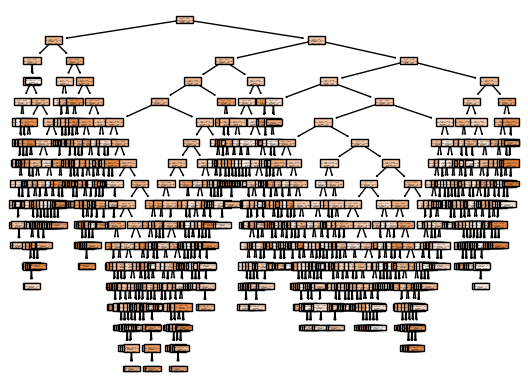

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [28]:
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [29]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
